# Reading and Writing data files using numPy

<div class="alert alert-info" role="alert">
Estimated time to complete: 1 hour
</div>

In [1]:
#if you want this notebook to use the noTeXbook theme
#install with $pip install notexbook-theme in a terminal
#and then uncomment the next two lines:
%load_ext notexbook
%texify

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Making some fake data and writing it out to a data file
### Create four arrays using numPy: <br>
a. an array of times, $t$,  from 0.0 up to and including 10.0 seconds, in steps of 0.5 seconds<br>
b. an array of Gaussian disributed time uncertainties, $\delta t$, with $\sigma = 0.2\;\mathrm{s}$. <br>
c. an array of positions, $y$, described by $y = \frac{1}{2} g t^2$, where $g = 9.80 \pm 0.01\;\mathrm{m/s}^2$<br>
d. an array of position uncertainties consistent with the time uncertainties, and consistent with the uncertainty on $g$. For this last part, show explicity in a markdown cell (using $\LaTeX$ to typeset the mathematics) how to compute this uncertainty in $y$<br>

In [3]:
# Your code here

In [4]:
σ = 0.20
μ = 0.00 
g = 9.80
δg = 0.01
t = np.arange(0,10.5,0.5)
δt = np.abs(np.random.normal(μ, σ, len(t)))
y = 0.5*g*t**2

To compute the uncertainty in $y$, we use the differential error propagation method where

$$ \delta y \approx \sqrt{ \left(\frac{\partial y}{\partial g}\delta g\right)^2 + \left(\frac{\partial y}{\partial t}\delta t\right)^2 }$$

Computing the partial derivatives and substituting, we want to compute

$$ \delta y \approx \sqrt{ \left( \frac{t^2}{2}\;\delta g \right)^2 + \left( gt \;\delta t \right)^2 }, $$

but, since the function for $y$ is a simple product of powers, we could have used the fact that this expression simplifies to 

$$ \delta y \approx  y \, \sqrt{ \left( \frac{\delta g}{g} \right)^2 + \left( 2\frac{\delta t}{t} \right)^2 }. $$

I will use this second form to compute $\delta y$. Notice that if I do the sensible thing using numPy, I have a problem when $t=0$:

In [5]:
δy = y*np.sqrt( (δg/g)**2 + (2*δt/t)**2 )

<ipython-input-5-f293fece8f3e>:1: RuntimeWarning: divide by zero encountered in true_divide
  δy = y*np.sqrt( (δg/g)**2 + (2*δt/t)**2 )
<ipython-input-5-f293fece8f3e>:1: RuntimeWarning: invalid value encountered in multiply
  δy = y*np.sqrt( (δg/g)**2 + (2*δt/t)**2 )


The fix for this is to compute $\delta y$ forgoing the first element, and then manually inserting 0.0 when done:

In [6]:
δy = y[1: ]*np.sqrt( (δg/g)**2 + (2*δt[1:]/t[1:])**2 )
δy = np.insert(δy, 0, 0.0)  # manually insert 0.0 before array index 0 of δy

### Write out the data using np.savetxt
Write the data out:<br>
- in four columns: t, dt, y, dy
- the first row is a header row
- the second row specifies the units
- the file to write should be called fake_free_fall.txt. 
- write all numerical values with only two decimal places

See [numpy.savetxt documentation](https://numpy.org/devdocs/reference/generated/numpy.savetxt.html) for info about this function. You will have to figure out how to write out the one dimensional arrays as columns. Google is your friend. The first three lines of your file should look like (you will want to use the option comments='' so that there is no '#' at the beginning of the first two header lines).

| t   | dt |  y   | dy |
| :--- | :-----------| :--- | :-----------|
|   s     |      s       |    m     |      m       |
| 0.00     | 0.10 | 0.00 | 0.00 |

In [7]:
np.savetxt('fake_free_fall.txt', np.column_stack((t, δt*np.ones(len(t)), y, δy)), fmt='%.2f', header ='t dt y dy\ns s m m', comments='')
# comment: I used comment='' to avoid placing a '#' at the beginning of the header string; this will be helpful when we use Pandas

### Reading in a data file using numpy.loadtxt
For straighforward data files (no missing values or strange type switching), np.loadtxt is a simple way to read in
data that is saved as a text or a csv (comma separated value) file. This means that you could use a simple spreadsheet when
manually recording data and save it as .txt or .csv and it will be easy to read. 

Use numpy.loadtxt to read the data file fake_free_fall.txt; read the data directly into t, dt, y, dy:

In [8]:
t, dt, y, dy = np.loadtxt('fake_free_fall.txt', skiprows=2, unpack=True)

### Now plot the data
Make a plot of $y$ vs $t$, and include error bars on each point. Make the capsize equal to three, figsize=(12,6), and make the ticklabel size 16, and axes label font size=20. 

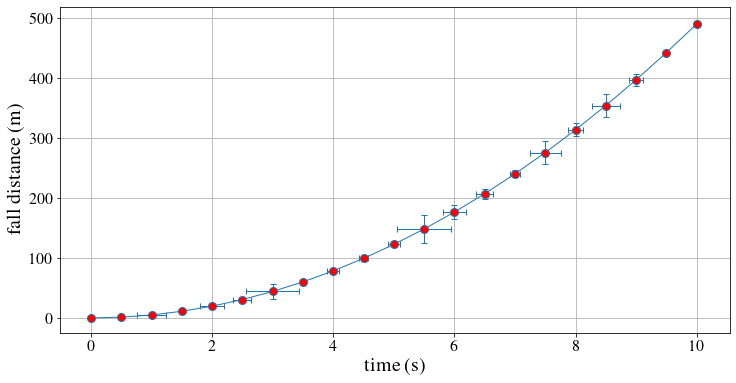

In [9]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
})
plt.figure(figsize=(12,6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.errorbar(t, y, xerr=dt, yerr=dy, capsize=3, marker='o', markersize=8, markerfacecolor='red', linewidth=1)
plt.xlabel("time (s)", fontsize=20)
plt.ylabel("fall distance (m)", fontsize=20)
plt.show()
